# Multi-Dimensional Scaling (MDS) 란? 
**PCA**
- MDS 설명하기에 앞서 PCA에 관한 간단한 설명을 하겠습니다. 
- PCA는 원본 고 차원의 데이터를 저 차원 초평면에 투영(projection)하는 방법으로 데이터의 분산을 최대화 하며 서로 직교하는 unit vector를 찾는 것을 목적으로 합니다. 

**MDS** 
- MDS 는 PCA와 달리 원본 데이터 필드 상에서의 레코드들 간의 거리를 저차원에서도 최대한 보존하는 것을 목적으로 합니다. 
- 고차원 상에서의 매니폴드로 부터 개체간 거리를 동일하게 유지되는 저차원 공간으로 매핑하는 것을 목적으로 합니다. 
- MDS에서는 데이터의 특징이 다른 객체간의 pairwise-distance가 됩니다. 
- Distance는 유클리디안 거리를 기본적으로 사용 

**MDS 활용** 
- MDS 방법을 활용해 저차원으로 매핑할 경우 2차원 평면에서의 시각화가 가능하며 데이터를 직관적으로 파악할 수 있게 됩니다. 
- 도시별 좌표 정보가 있을 때 도시별로 어디가 가깝고 먼지 확인하고 싶을 때 MDS를 사용하면 직관적으로 알 수 있게 됩니다. 


# MDS step 
- MDS 활용 예시로 iris 데이터를 사용 

## step 1. Construct Proximity/Distance Matrix 
- 기존의 데이터를 유클리디안 거리를 이용해 D(Distance) Matrix로 변환 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris
from tqdm import tqdm 

In [2]:
#데이터 로드 
data = load_iris() 
df = pd.DataFrame(data.data)
df.columns = data['feature_names']
df['class'] = data['target']
df = df.sample(frac=1,random_state=42).reset_index(drop=True)

In [3]:
#객체별 거리 계산 후 Dmatrix 생성 
Dmatrix = []
for i in tqdm(range(len(df))):
    values = df.iloc[i,:].values
    target_values = df.values
    Dmatrix.append(np.sum(((target_values-values)**2)**0.5,axis=1))
Dmatrix = pd.DataFrame(Dmatrix)    
Dmatrix
    

100%|██████████| 150/150 [00:00<00:00, 1111.01it/s]


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,6.3,6.1,0.7,1.0,6.3,1.8,3.6,1.2,1.2,...,1.1,0.9,2.5,2.4,6.3,0.8,3.2,7.0,1.2,4.3
1,6.3,0.0,12.4,6.2,7.3,1.0,4.9,9.3,7.1,5.3,...,6.8,6.2,8.0,7.9,0.8,5.7,8.3,0.9,5.5,10.2
2,6.1,12.4,0.0,6.2,5.1,12.4,7.7,3.1,6.1,7.1,...,6.2,6.2,4.6,4.5,12.4,6.7,5.9,13.1,6.9,2.2
3,0.7,6.2,6.2,0.0,1.3,6.2,1.5,3.5,0.9,1.3,...,1.2,0.8,2.4,2.1,6.2,0.9,2.7,6.9,1.3,4.2
4,1.0,7.3,5.1,1.3,0.0,7.3,2.6,2.6,1.6,2.2,...,1.5,1.1,2.9,2.8,7.3,1.6,3.8,8.0,2.2,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.8,5.7,6.7,0.9,1.6,5.7,1.0,4.2,1.4,0.6,...,1.1,0.7,3.1,3.0,5.7,0.0,3.4,6.4,0.6,4.9
146,3.2,8.3,5.9,2.7,3.8,7.7,3.4,3.8,2.8,3.2,...,3.1,3.5,1.7,2.2,7.7,3.4,0.0,9.2,3.0,4.5
147,7.0,0.9,13.1,6.9,8.0,1.5,5.8,10.0,7.8,6.0,...,7.5,6.9,8.9,8.6,1.5,6.4,9.2,0.0,6.2,10.9
148,1.2,5.5,6.9,1.3,2.2,5.5,1.0,4.8,1.6,0.2,...,1.3,1.3,3.1,3.2,5.5,0.6,3.0,6.2,0.0,5.5


## step2 : HAH 계산 

$[A]_{rs} = a_{rs}$

$H = I - {1\over n}11^T$


$B = HAH$

In [5]:
n = len(Dmatrix)
H = np.eye(n)-(1/n)*(np.ones((n,n)))
B = -H.dot(Dmatrix).dot(H)/2

In [15]:
pd.DataFrame(B)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.397409,-0.923258,0.178742,1.004076,1.082076,-1.019924,0.498076,0.251409,1.029409,0.807409,...,1.036076,0.952742,0.446742,0.444742,-1.015924,0.981409,0.223409,-0.983924,0.832076,0.168742
1,-0.923258,3.056076,-2.141924,-0.916591,-1.238591,2.459409,-0.222591,-1.769258,-1.091258,-0.413258,...,-0.984591,-0.867924,-1.473924,-1.475924,2.563409,-0.639258,-1.497258,2.895409,-0.488591,-1.951924
2,0.178742,-2.141924,5.060076,0.085409,0.863409,-2.238591,-0.620591,2.332742,0.410742,-0.311258,...,0.317409,0.134076,1.228076,1.226076,-2.234591,-0.137258,0.704742,-2.202591,-0.186591,3.050076
3,1.004076,-0.916591,0.085409,1.310742,0.888742,-1.013258,0.604742,0.258076,1.136076,0.714076,...,0.942742,0.959409,0.453409,0.551409,-1.009258,0.888076,0.430076,-0.977258,0.738742,0.175409
4,1.082076,-1.238591,0.863409,0.888742,1.766742,-1.335258,0.282742,0.936076,1.014076,0.492076,...,1.020742,1.037409,0.431409,0.429409,-1.331258,0.766076,0.108076,-1.299258,0.516742,0.853409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.981409,-0.639258,-0.137258,0.888076,0.766076,-0.735924,0.882076,-0.064591,0.913409,1.091409,...,1.020076,1.036742,0.130742,0.128742,-0.731924,1.365409,0.107409,-0.699924,1.116076,-0.147258
146,0.223409,-1.497258,0.704742,0.430076,0.108076,-1.293924,0.124076,0.577409,0.655409,0.233409,...,0.462076,0.078742,1.272742,0.970742,-1.289924,0.107409,2.249409,-1.657924,0.358076,0.494742
147,-0.983924,2.895409,-2.202591,-0.977258,-1.299258,2.498742,-0.383258,-1.829924,-1.151924,-0.473924,...,-1.045258,-0.928591,-1.634591,-1.536591,2.502742,-0.699924,-1.657924,3.634742,-0.549258,-2.012591
148,0.832076,-0.488591,-0.186591,0.738742,0.516742,-0.585258,0.932742,-0.313924,0.864076,1.342076,...,0.970742,0.787409,0.181409,0.079409,-0.581258,1.116076,0.358076,-0.549258,1.466742,-0.396591


## step 3. Eigen-decomposition 고유벡터 구하기 

In [10]:
eigen_value,eigen_vector = np.linalg.eig(B)
inverseEigenVectors = np.linalg.inv(eigen_vector) 
diagonal= inverseEigenVectors.dot(B).dot(eigen_vector)

## step4 : 원하는 차원으로 축소 

In [12]:
dimension = 2
B_1 = eigen_vector[:,0:dimension].dot(diagonal[0:dimension,0:dimension]).dot(eigen_vector[:,0:dimension].T)
diagonal[diagonal<1] = 0
coordinate_X = eigen_vector[:,0:dimension].dot(np.sqrt(diagonal[0:dimension,0:dimension]))

c:\Users\dags8\anaconda3\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


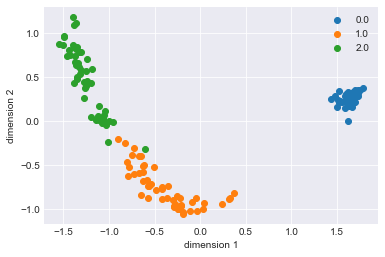

In [32]:
import matplotlib.pyplot as plt 
y =df['class'].values +1
with plt.style.context("seaborn-darkgrid"):
    for l in np.unique(y):
        plt.scatter(coordinate_X[y==l,0], coordinate_X[y==l,1],label=l)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.legend()
    plt.show()

# MDS library example 


In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1
...,...,...,...,...,...
145,6.1,2.8,4.0,1.3,1
146,4.9,2.5,4.5,1.7,2
147,5.8,4.0,1.2,0.2,0
148,5.8,2.6,4.0,1.2,1


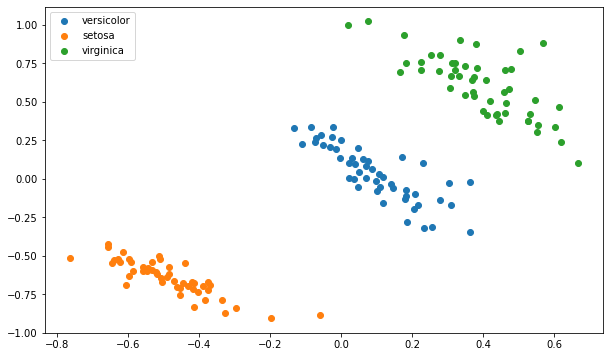

41.3231965406364


In [57]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df)


from sklearn.manifold import MDS
mds_sklearn = MDS(n_components=2)
x_sklearn = mds_sklearn.fit_transform(x_scaled)

plt.figure(figsize=(10,6))
label_unique = df['class'].unique()
cities = {key:value for key,value in enumerate(data.target_names)}
for i in range(len(label_unique)):
    label = label_unique[i]
    scatter_value = x_sklearn[df[df['class'] == label].index]
    plt.scatter(x = scatter_value[:,0],
                y = scatter_value[:,1],
                label = cities[label])
    plt.legend()            
plt.show()
print(mds_sklearn.stress_)